# The QMCPY Plot Projection Function for Discrete Distribution and True Measure

This notebook demonstrates the different usages of the plot_proj function for Discrete Distribution and True Measure

A Discrete Distribution or True Measure object with d dimensions has a maximum of $d\times(d-1)$ dimensional pairings (for e.g: [2,3] and [3,2] are being considered seperate parings). The plot_proj function plots all or a subset of all the possible dimension pairings using the parameters d_vertical and d_horizontal and can also display extensibility based on the parameter n.

### Here we set up the QMCPY environment enabling us to utilize this function:

In [1]:
import qmcpy as qp

### Here we explain the parameters of the plot_proj function:

In [2]:
help(qp.plot_proj)

Help on function plot_proj in module qmcpy.util.plot_functions:

plot_proj(sampler, n=64, d_horizontal=0, d_vertical=1, math_ind=False, marker_size=5, **kwargs)
    Args:
        sampler: the Discrete Distribution or the True Measure Object to be plotted
        n (int or list): the number of samples or a list of samples(used for extensibility) to be plotted. 
            Default value is 64
        d_horizontal (int or list): the dimension or list of dimensions to be plotted on the horizontal axes. 
            Default value is 0 (1st dimension).
        d_vertical (int or list): the dimension or list of dimensions to be plotted on the vertical axes. 
            Default value is 1 (2nd dimension).
        math_ind : setting it true will enable user to pass in math indices. 
            Default value is false, so user is required to pass in python indices.
        marker_size: the marker size in points**2(typographic points are 1/72 in.).
            Default value is 5.
        **kwar

### Here we initialize different Discrete Distribution and True Measure Objects to demonstrate the applications of the plot_proj function:

In [3]:
import scipy.stats
iid = qp.IIDStdUniform(2)
halton = qp.Halton(4)
net = qp.DigitalNetB2(4)
lattice = qp.Lattice(5,generating_vector="lattice_vec_lnb.750.24.npy")
iid_gaussian = qp.Gaussian(iid,mean =[2,4],covariance=[[9,4],[4,5]])
halton_uniform = qp.Uniform(halton,lower_bound=[1,2,3,4],upper_bound=[5,7,9,11])
net_sci_py_wrapper = qp.SciPyWrapper(net,[scipy.stats.beta(a=1,b=5),scipy.stats.gamma(a=1),scipy.stats.uniform(loc = 1,scale = 2),scipy.stats.norm(loc = 3, scale = 4)])

### The following examples show plotting of different Discrete Distribution Objects:

Here we show 2 dimensional pairs plotting of an IID Object :

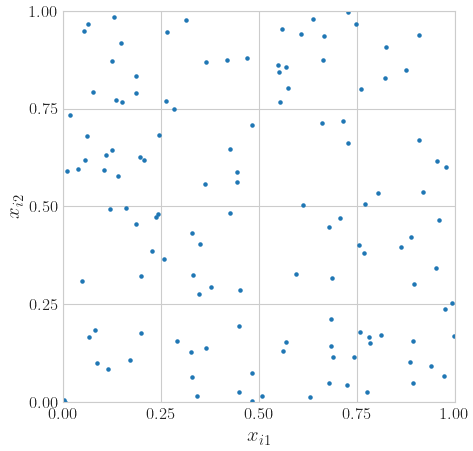

In [4]:
fig,ax = qp.plot_proj(iid, n = 2**7)

Here we show 2 dimensional pairs plotting of a LD Halton Object with extensibility :

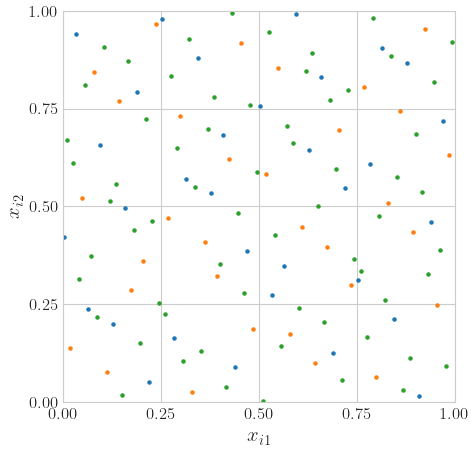

In [5]:
fig,ax = qp.plot_proj(halton, n = [2**5, 2**6, 2**7])

Here we show all dimensional pairs plotting of a LD Digital Net Object:

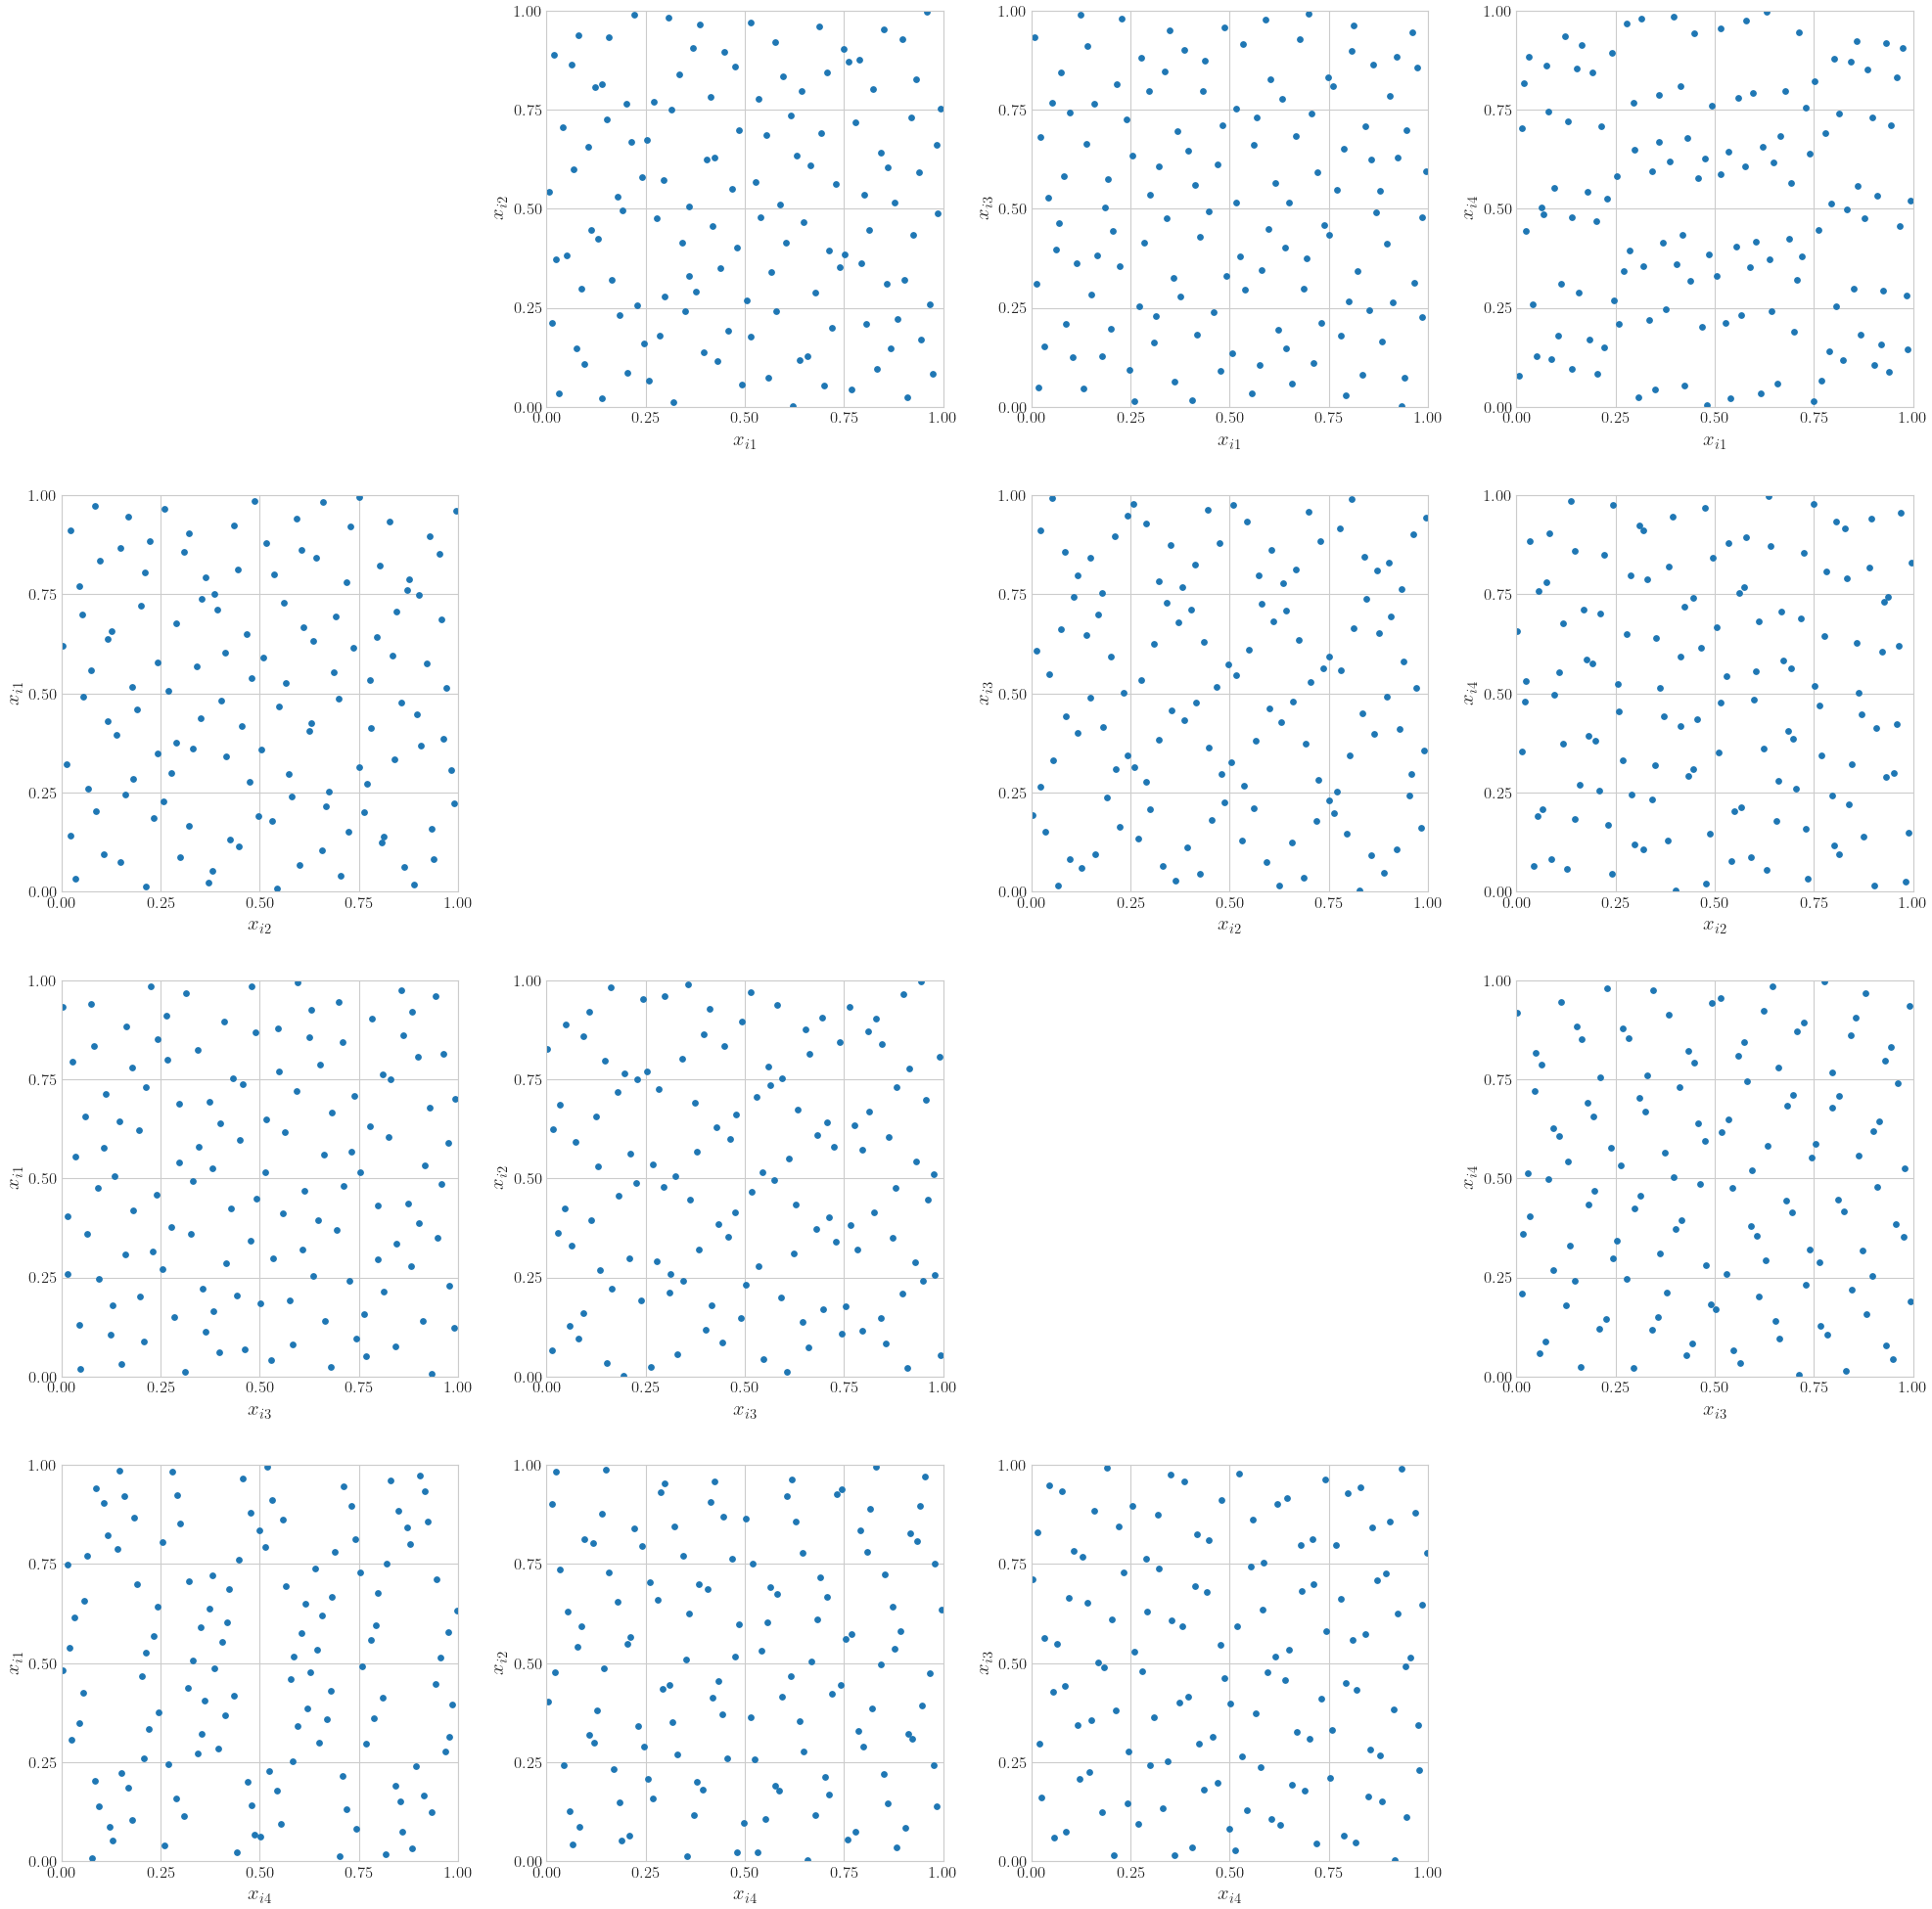

In [6]:
d = 4
net = qp.DigitalNetB2(d)
fig, ax = qp.plot_proj(net, n = 2**7, d_horizontal = range(d), d_vertical = range(d), math_ind = False, marker_size = 15)

Here we show certain specified dimensional pairs plotting (dimensions 1 and 3 on the x axis, dimensions 2 and 4 on the y axis) of a LD Digital Net Object:

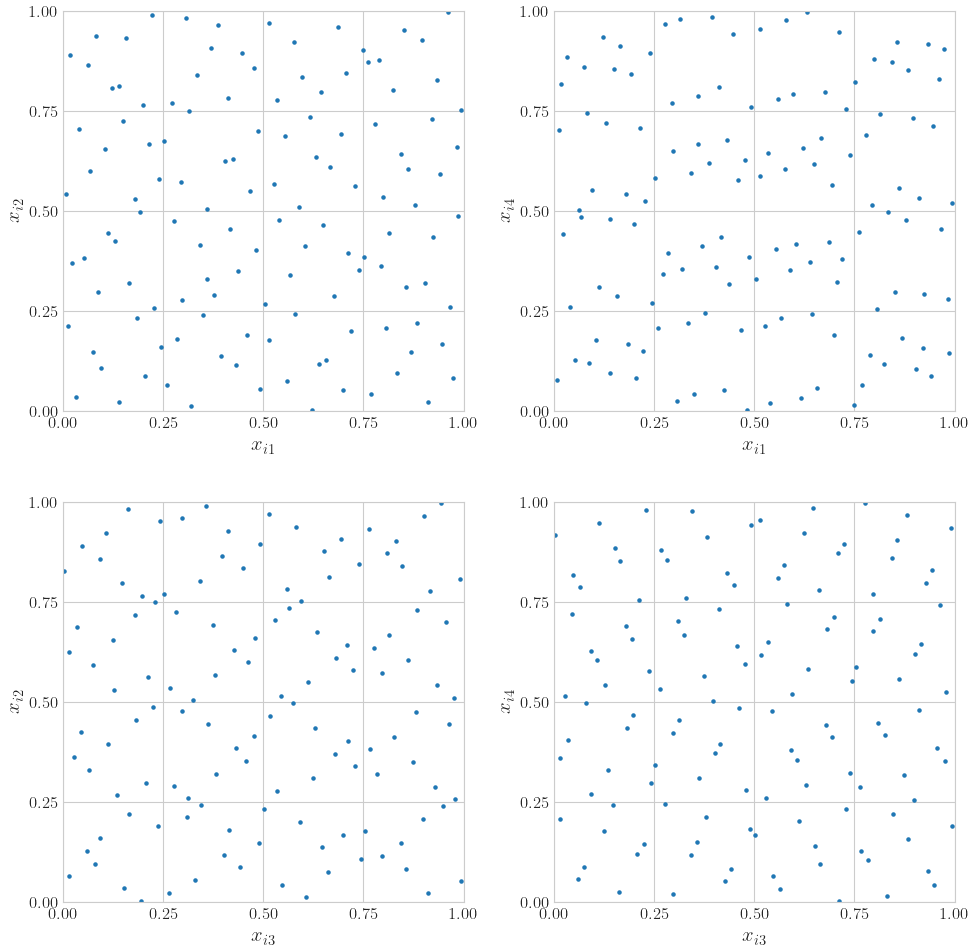

In [7]:
fig, ax = qp.plot_proj(net, n = 2**7, d_horizontal = [1,3], d_vertical = [2,4],math_ind= True)

Here we show all dimensional pairs plotting of a LD Lattice Object with extensibility:

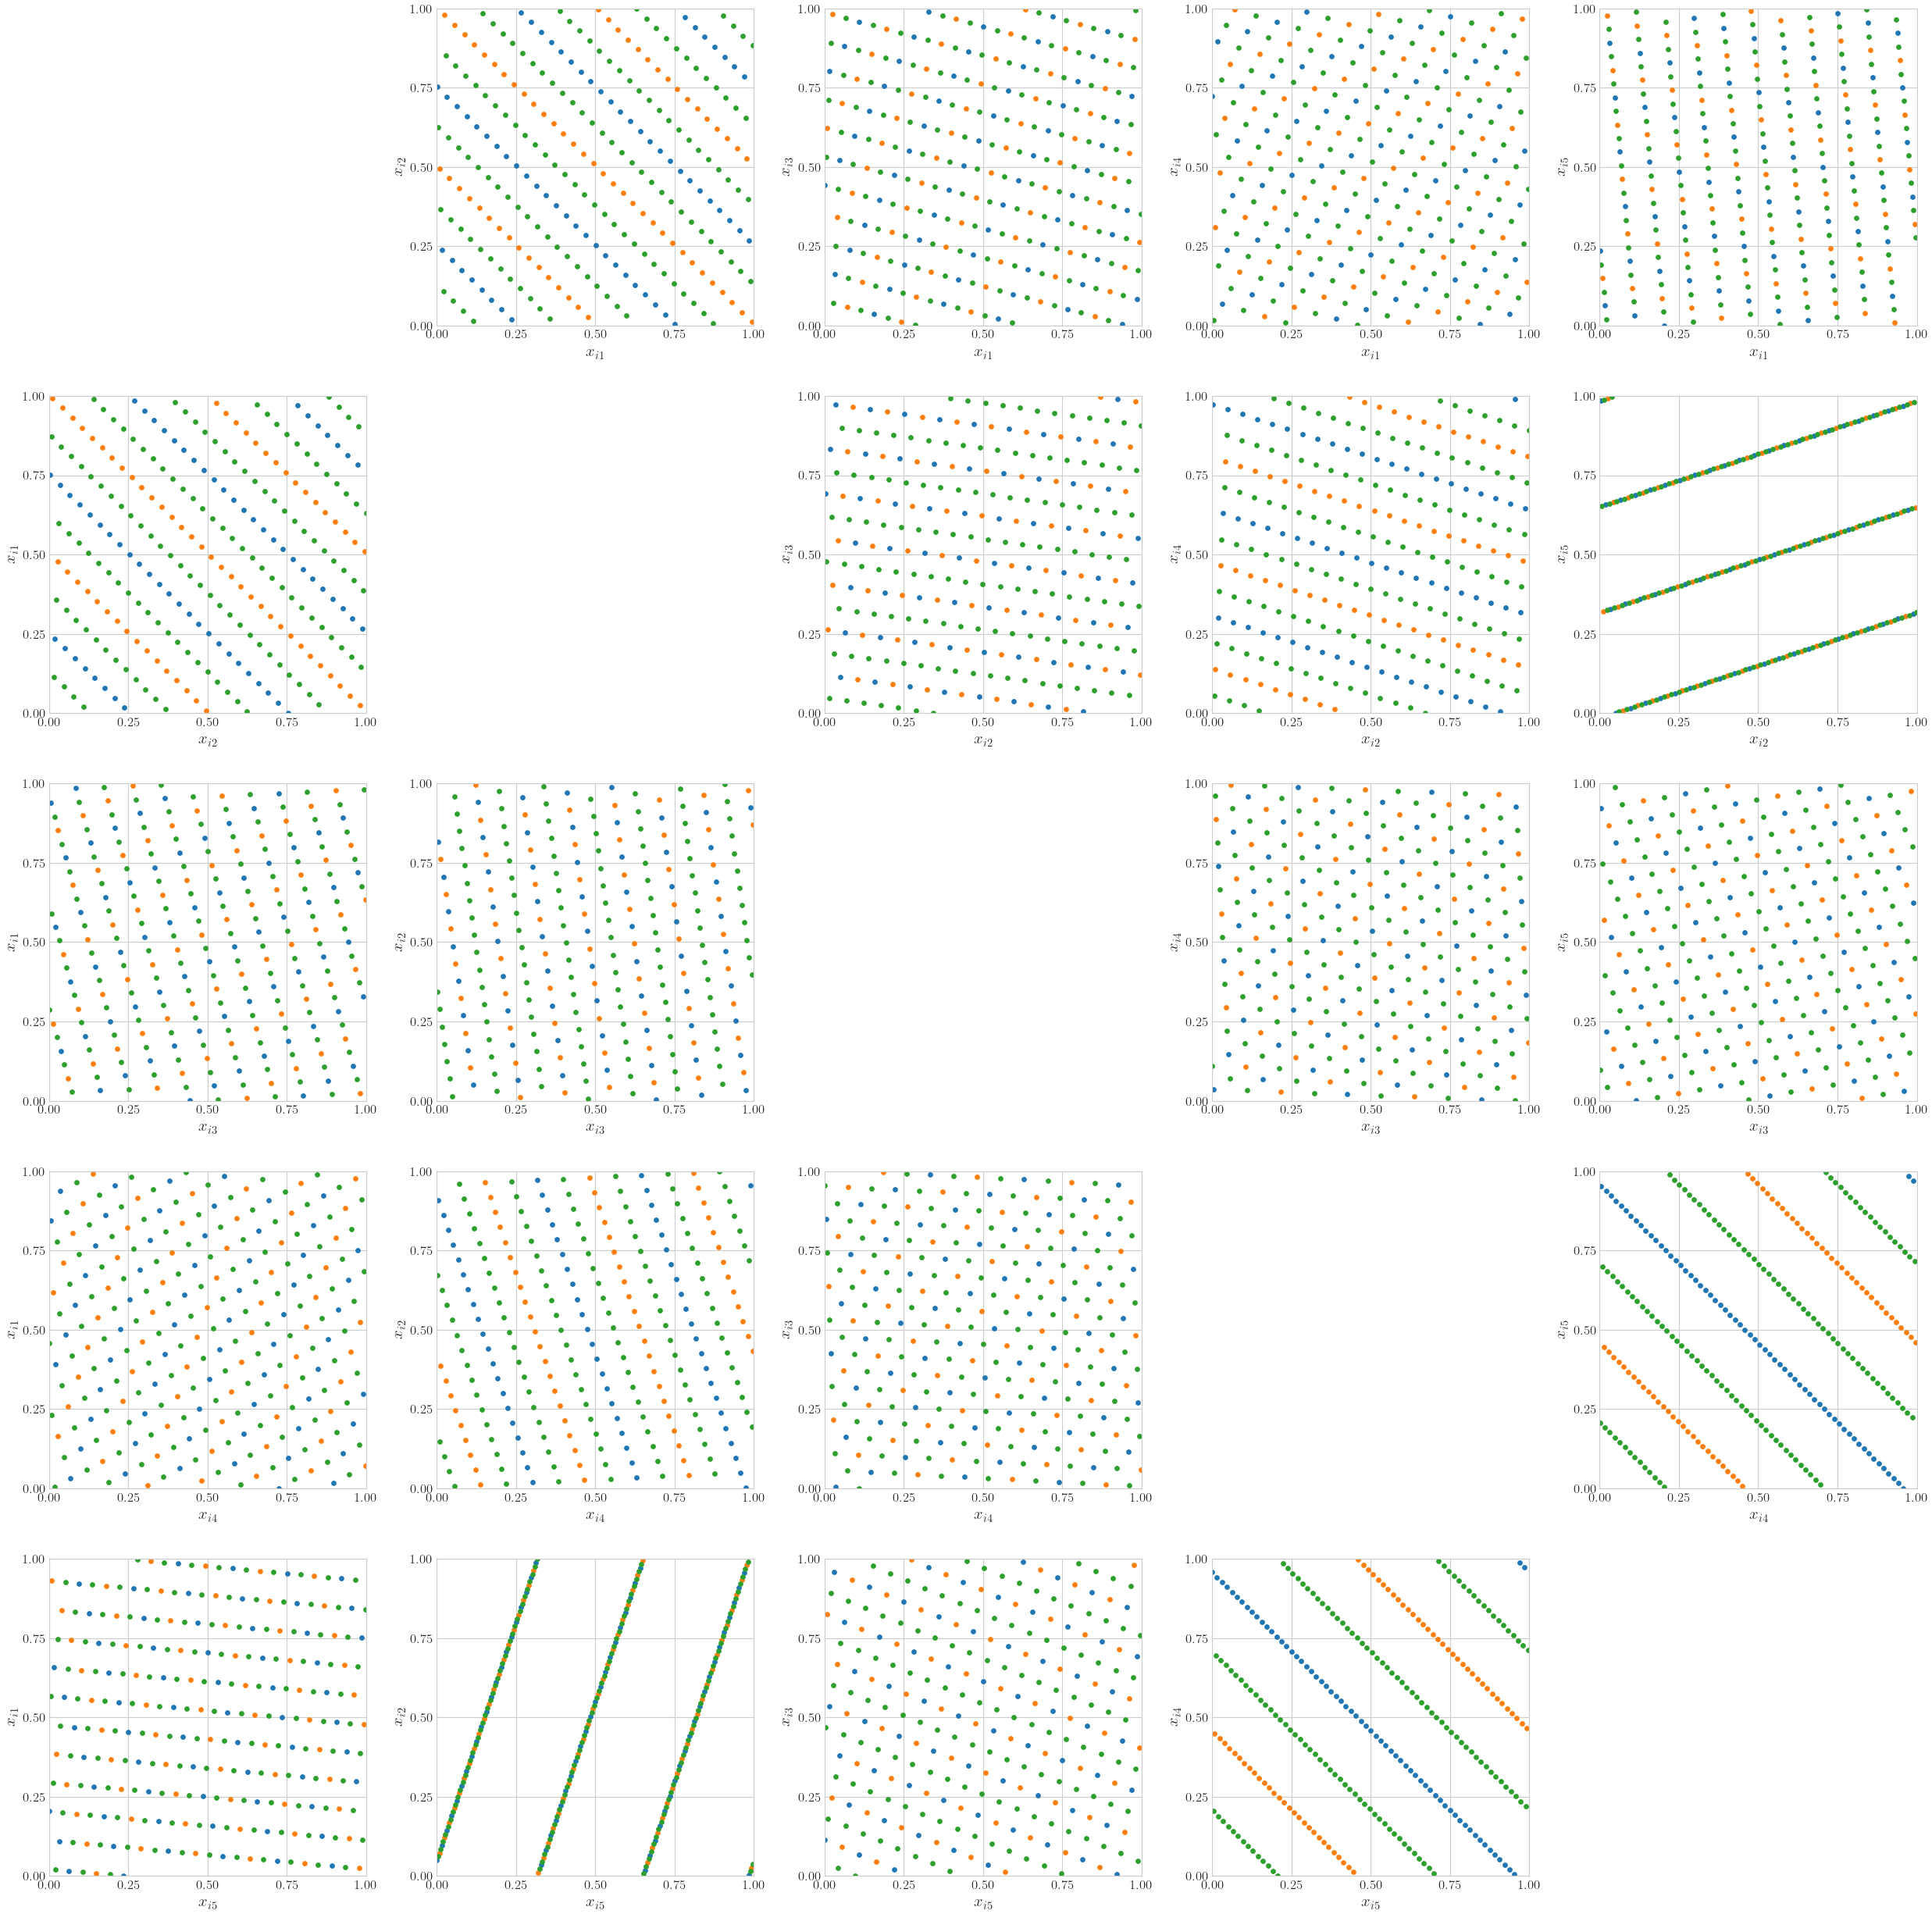

In [8]:
fig, ax = qp.plot_proj(lattice, n = [2**6, 2**7, 2**8], d_horizontal = [0,1,2,3,4], d_vertical = [0,1,2,3,4], marker_size = 15)

### The following examples show plotting of different True Measure Objects:

Here we show 2 dimensional pairs plotting of a Gaussian Object and how the axes returned by the plot_proj function can be manipulated by adding a horizontal and vertical line to denote the x and y axis respectively:

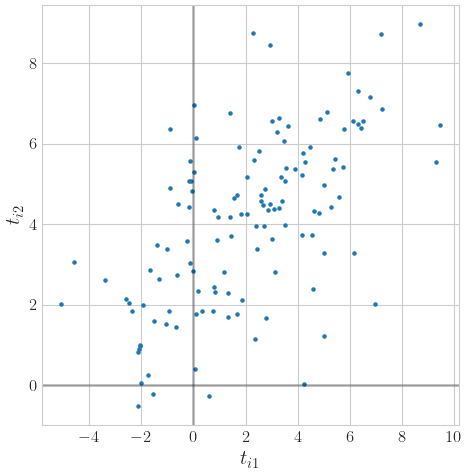

In [9]:
fig,ax = qp.plot_proj(iid_gaussian, n = 2**7)
ax[0,0].axvline(x=0,color= 'k',alpha=.25); #adding vertical line
ax[0,0].axhline(y=0,color= 'k',alpha=.25); #adding horizontal line

Here we show 2 dimensional pairs plotting of a Gaussian Object with extensibility:

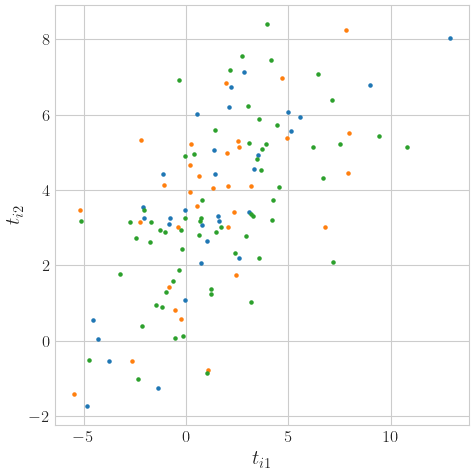

In [10]:
fig,ax = qp.plot_proj(iid_gaussian, n = [2**5,2**6,2**7])

Here we show all dimensional pairs plotting of a SciPyWrapper Object:

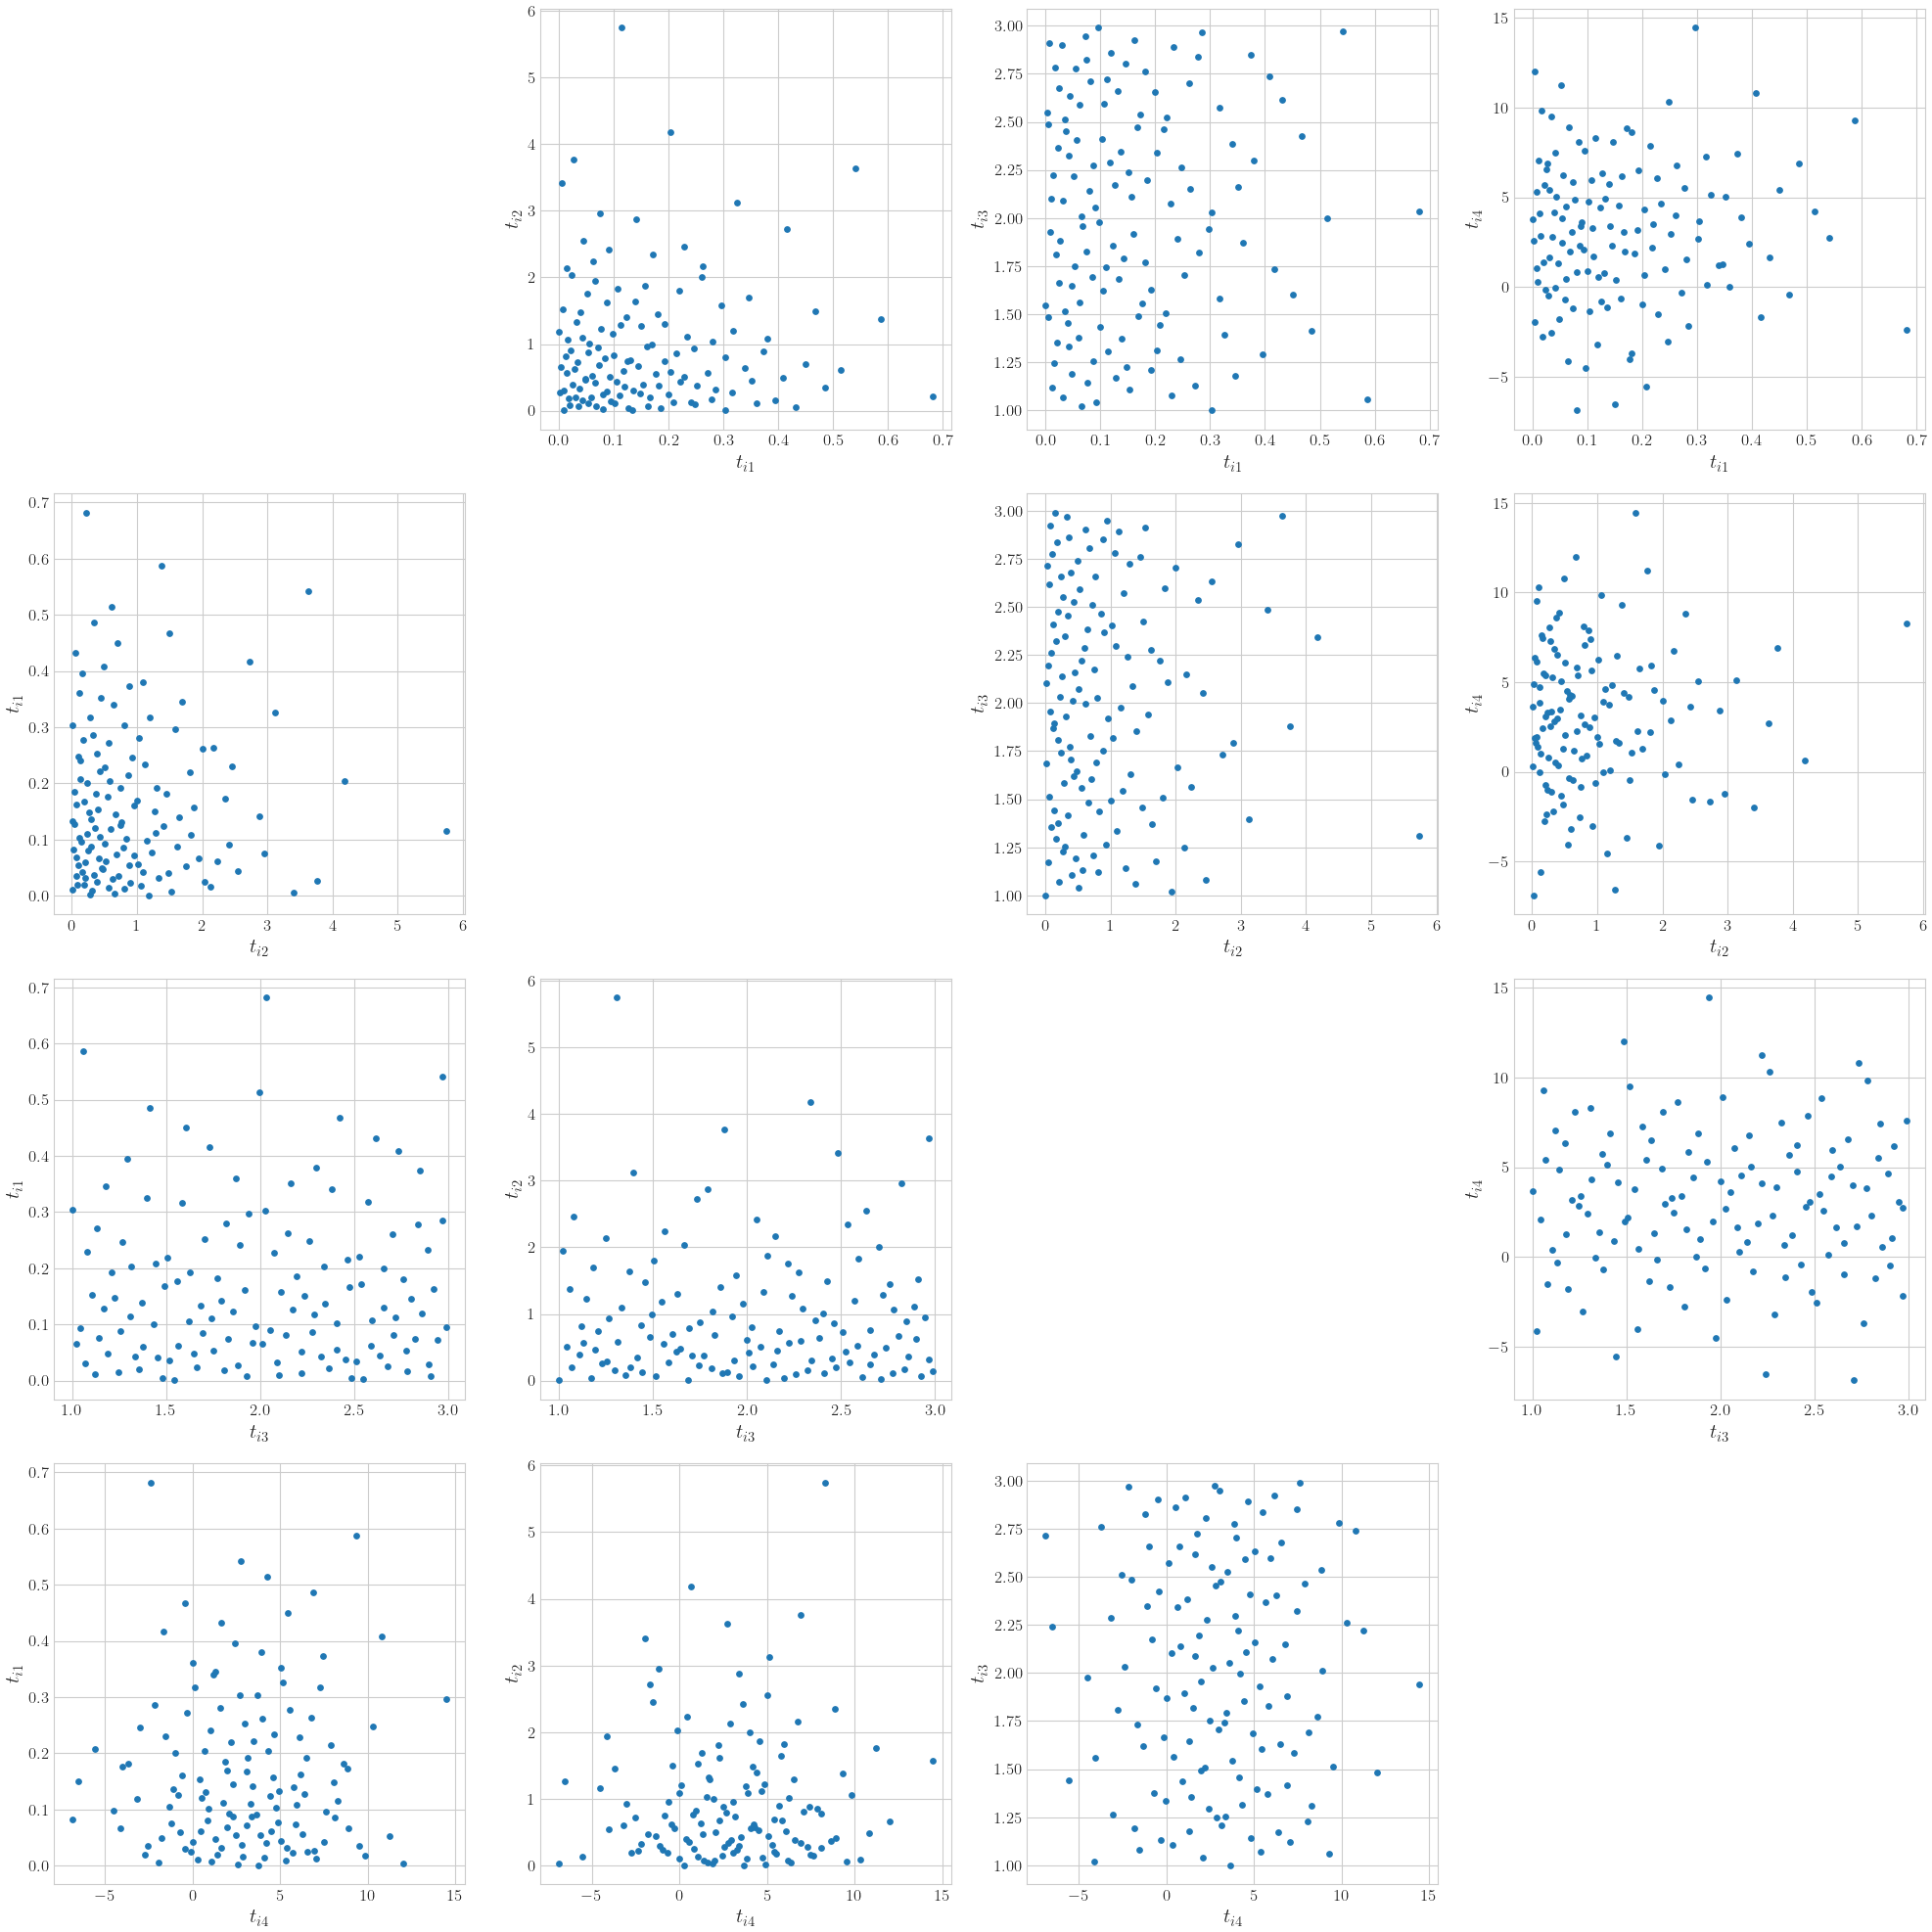

In [11]:
fig, ax = qp.plot_proj(net_sci_py_wrapper, n = 2**7, d_horizontal = [1,2,3,4], d_vertical = [1,2,3,4], math_ind= True, marker_size = 15)

Here we show certain specified dimensional pairs plotting (dimensions 1 and 3 on the x axis, dimensions 2 and 4 on the y axis) of a SciPyWrapper Object:

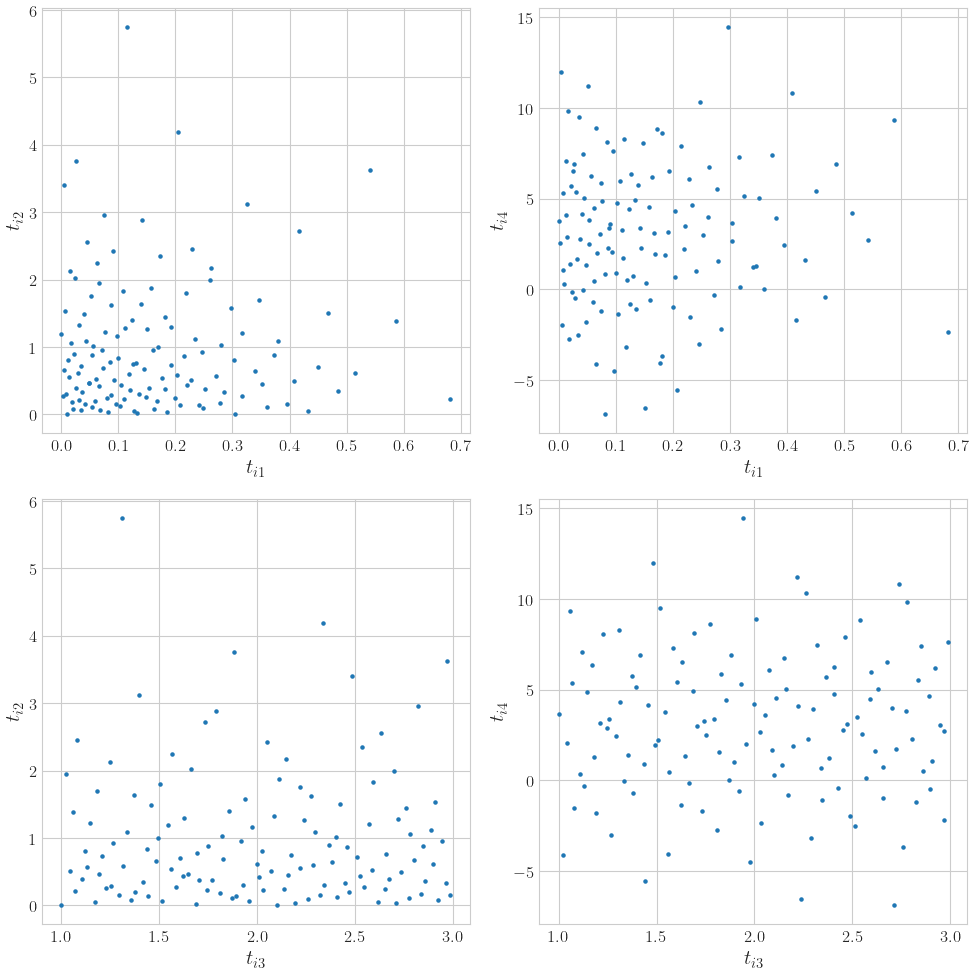

In [12]:
fig, ax = qp.plot_proj(net_sci_py_wrapper, n = 2**7, d_horizontal = [1,3], d_vertical = [2,4], math_ind = True)

Here we show all dimensional pairs plotting of a Uniform Object with extensibility: 

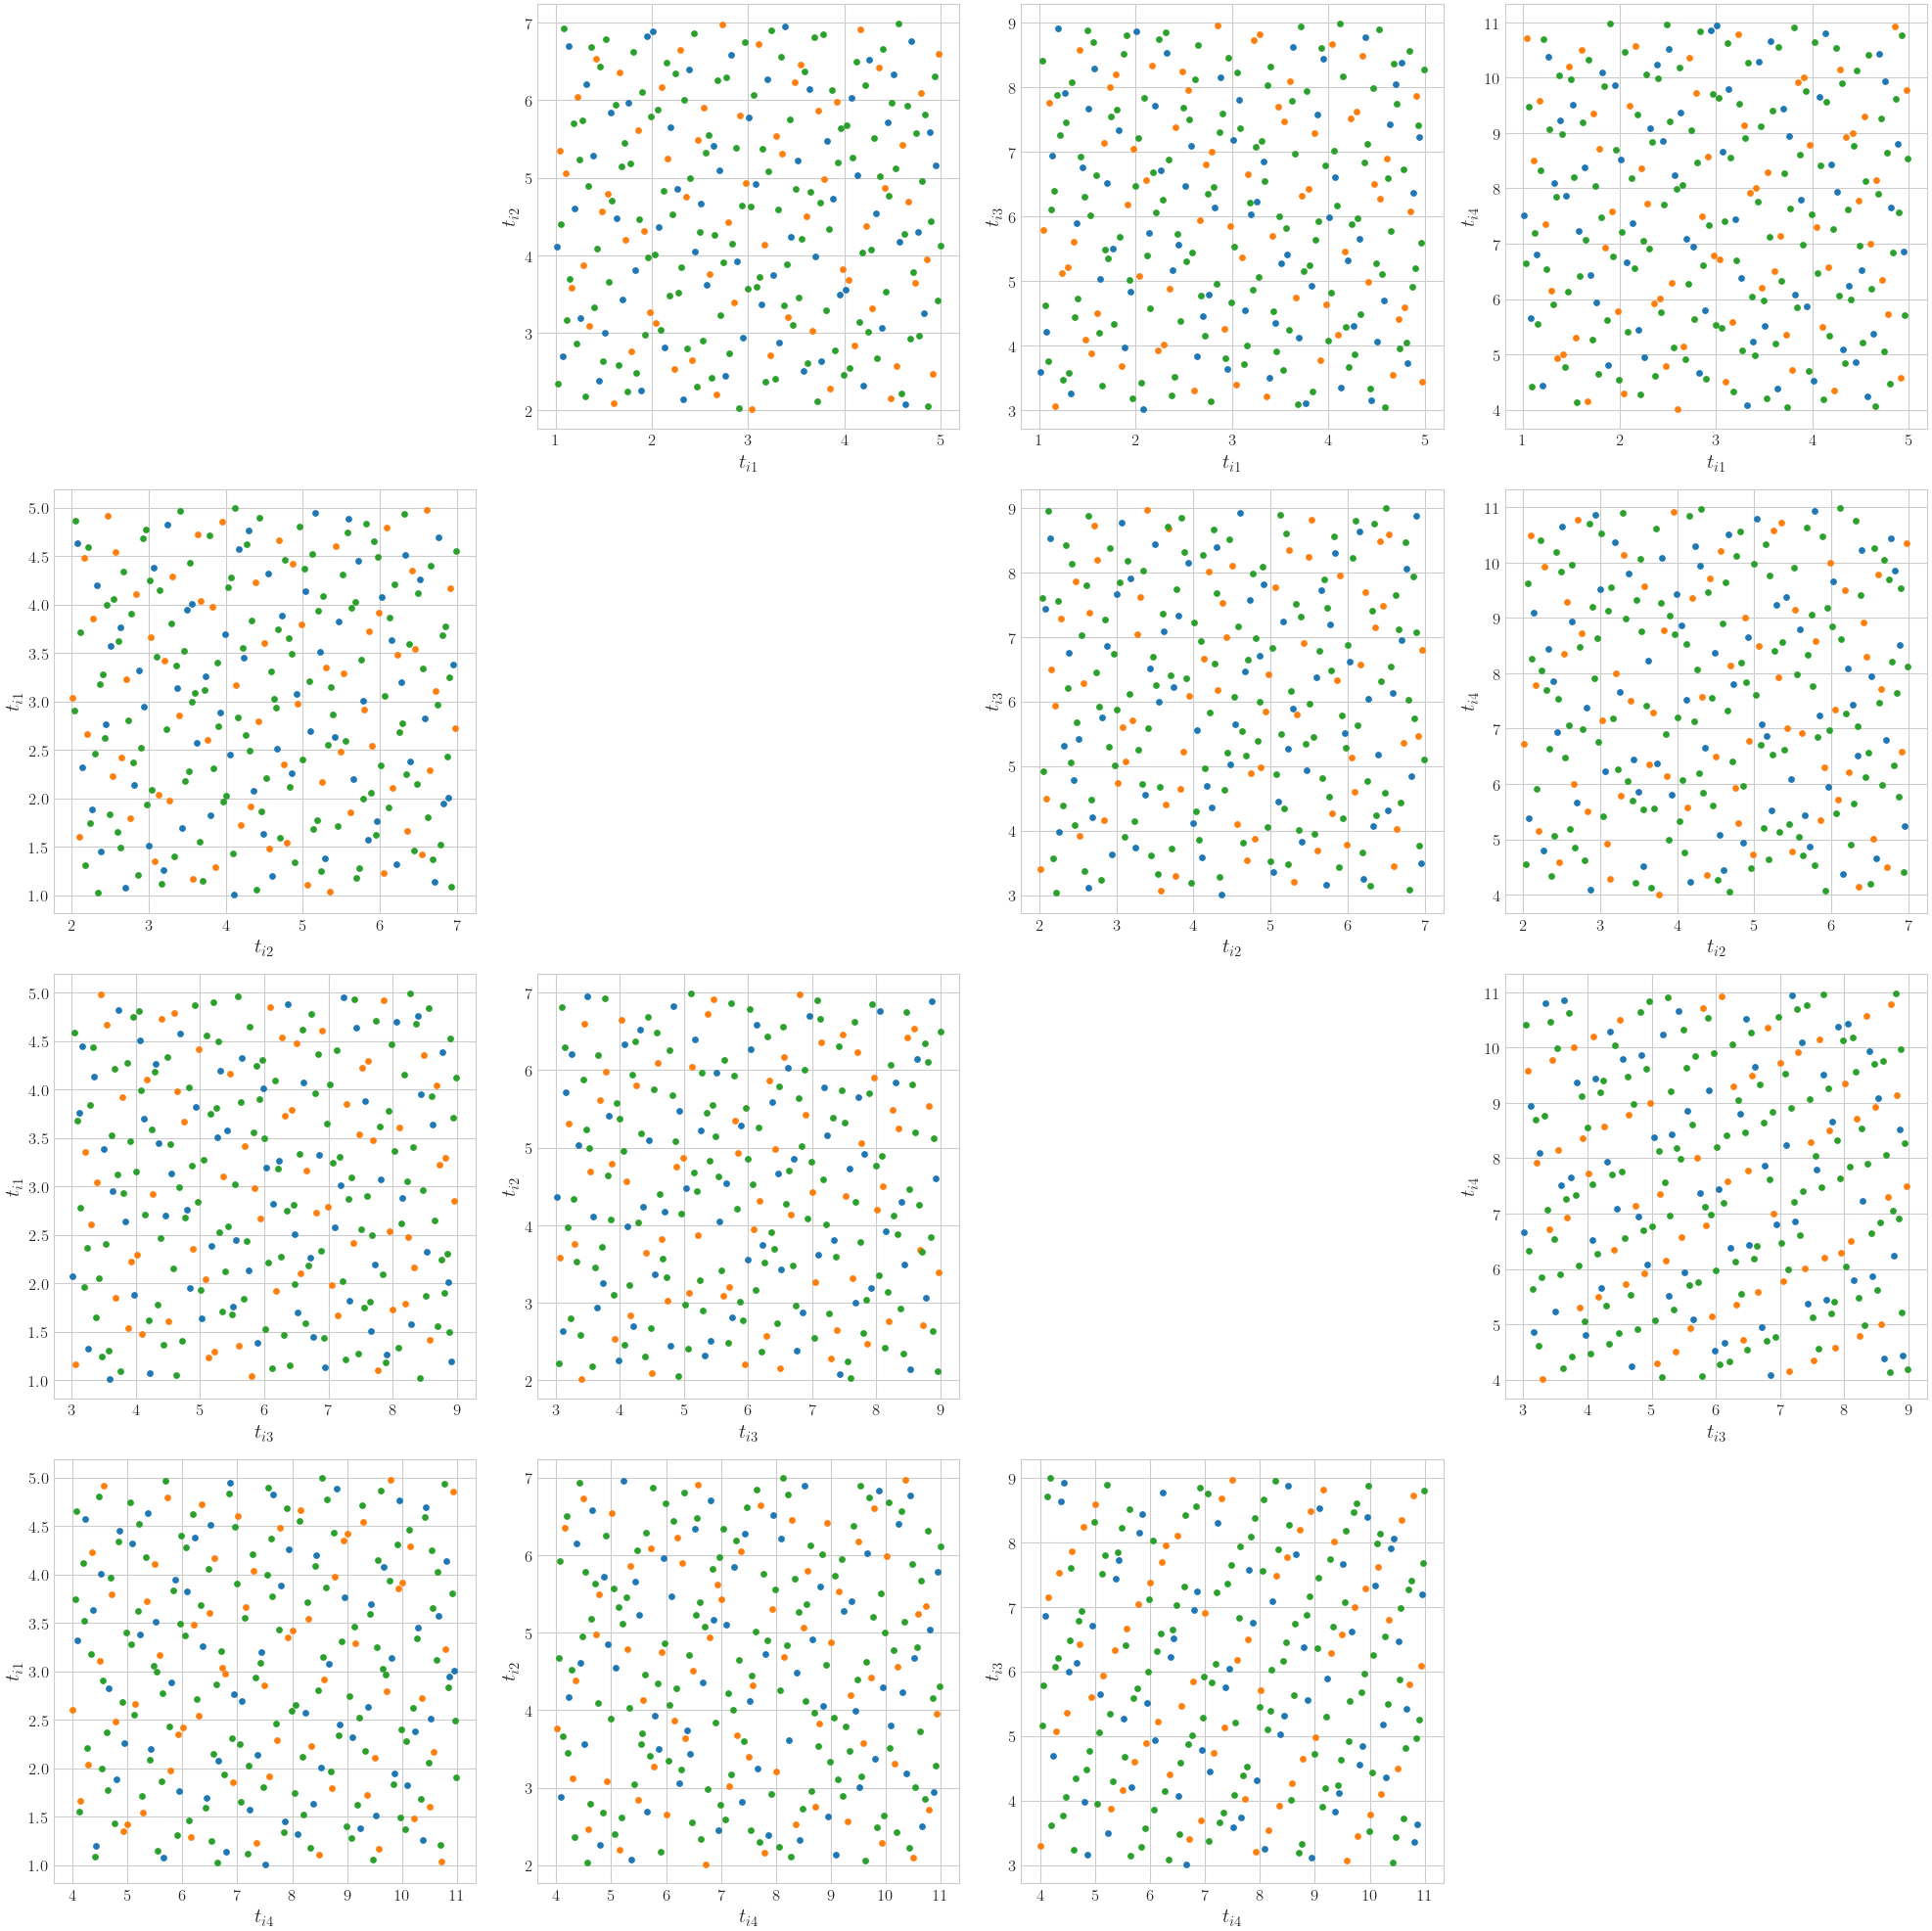

In [13]:
fig, ax = qp.plot_proj(halton_uniform, n = [2**6, 2**7, 2**8], d_horizontal = [0,1,2,3], d_vertical = [0,1,2,3], marker_size = 15)